**Sep, 2024**
**Heart Disease Prediction - Hackathon**
**ABDULMALIK AUWAL MAKAMA**

Importing necessary libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Importing dataset

In [109]:
hd_train = pd.read_csv("/content/Train Dataset .csv")
hd_test = pd.read_csv("/content/Test Dataset.csv")
submission_template = pd.read_csv("/content/Sample Submission.csv")

Viewing data sample

In [129]:
hd_train.sample(5)

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1686,11920,55,0,1,197,137,1,0,164,1,2.5,1,0,2,1
2242,16619,39,1,3,151,359,1,1,145,0,0.6,2,2,3,1
5508,11528,53,0,1,148,152,1,0,199,0,0.1,1,0,2,0
3173,16024,76,0,0,160,228,1,0,111,1,5.2,0,3,1,1
7246,15238,51,1,3,107,378,1,0,145,1,0.2,0,2,3,1


In [130]:
hd_test.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
801,60,0,3,165,133,1,1,115,0,2.0,1,0,1
2643,61,0,1,124,456,0,1,190,1,5.1,2,2,0
796,64,0,2,171,404,1,1,175,0,3.0,0,3,2
2664,61,0,0,96,331,0,2,159,1,5.1,1,2,0
1799,29,1,3,189,336,1,0,153,0,1.7,2,1,2


In [110]:
submission_template.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


Checking data types

In [ ]:
hd_train.dtypes

,0
Id,int64
Age,int64
Sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64


EDA

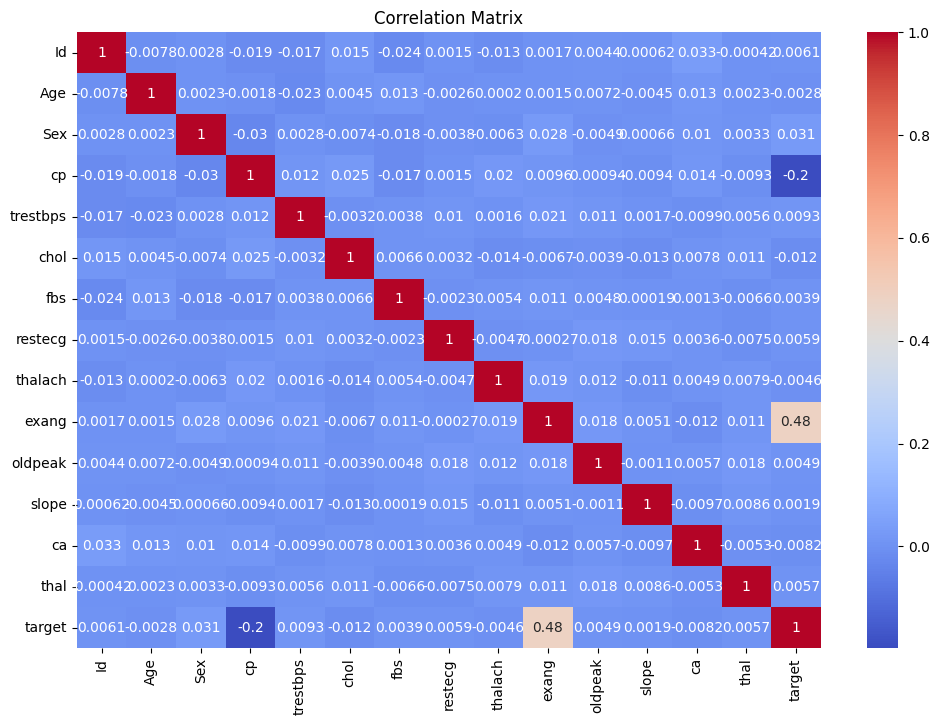

In [ ]:
correlation = hd_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
hd_train.describe()


,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for missing values

In [ ]:
hd_train.isnull().sum()

,0
Id,0
Age,0
Sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [ ]:
hd_train.shape

(7303, 15)

In [ ]:
hd_test.shape

(2697, 14)

In [ ]:
hd_test.isnull().sum()

,0
id,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


Preprocessing

In [112]:
#separating features with label
#features
hd_train_features = hd_train.drop(['Id','target'], axis=1)
#label
hd_train_label = hd_train['target']

Checking for outliers

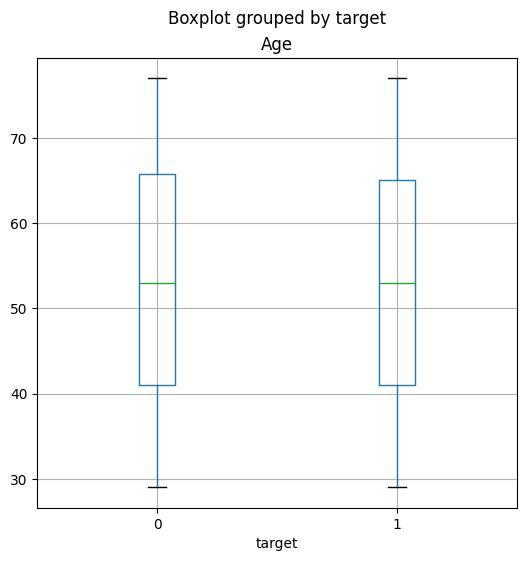

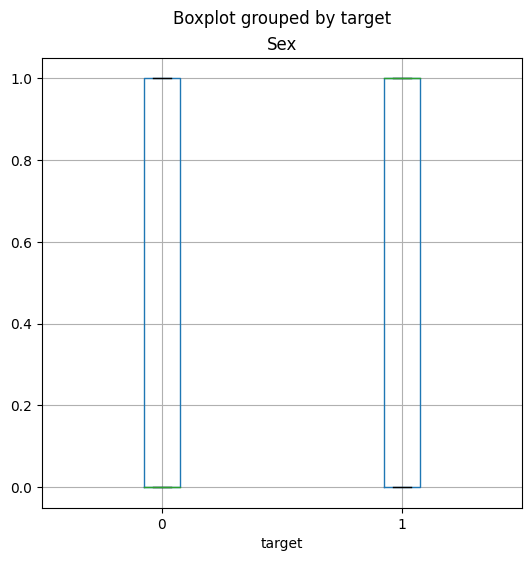

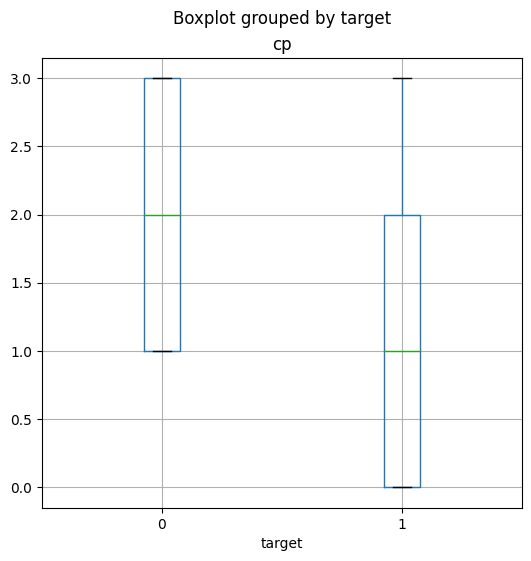

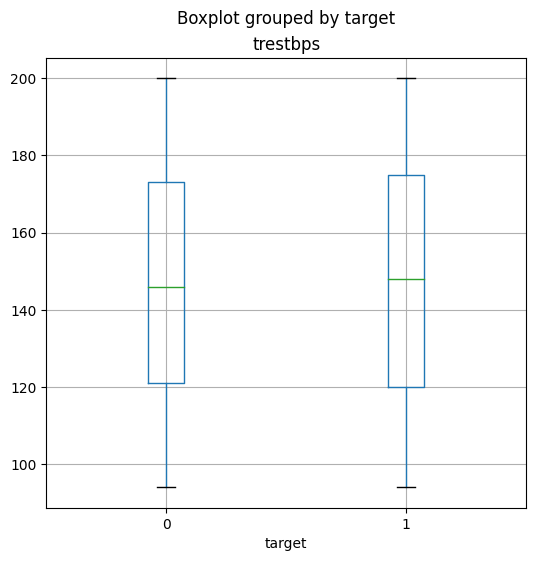

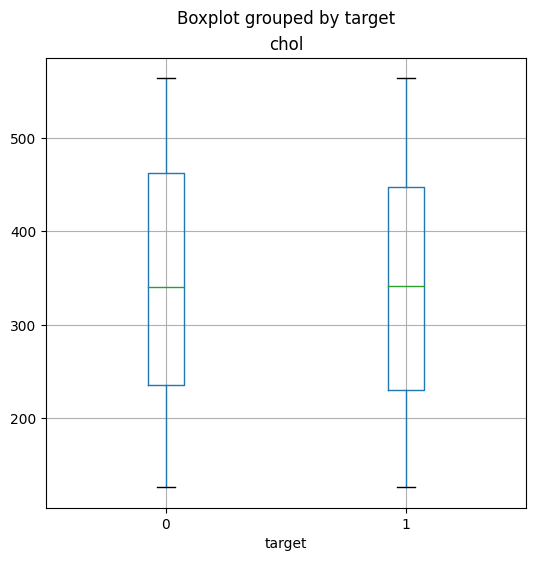

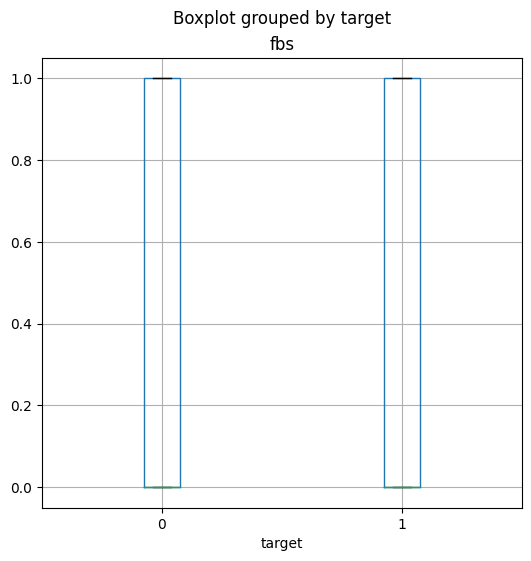

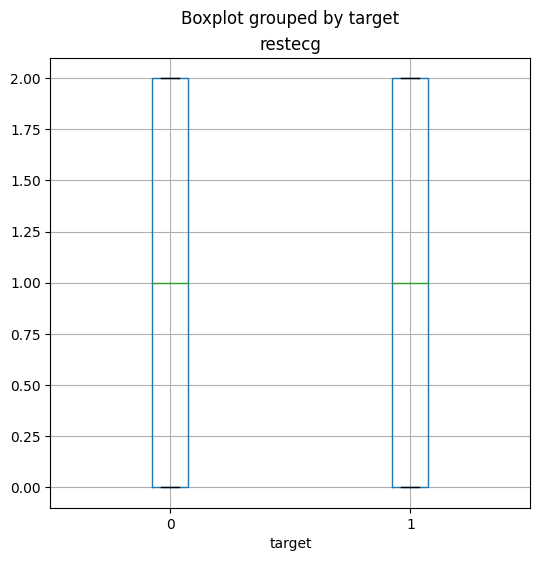

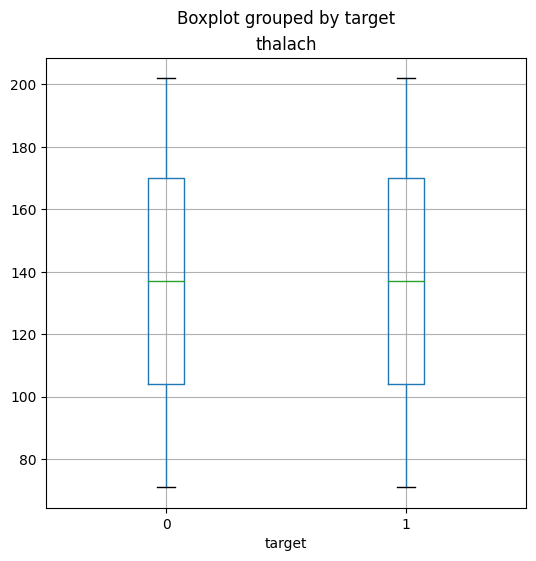

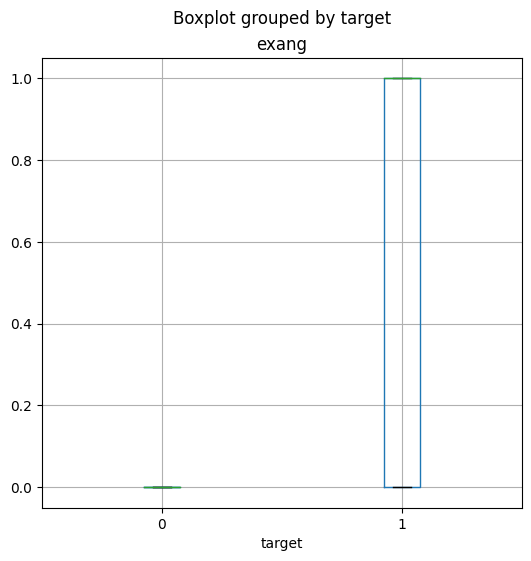

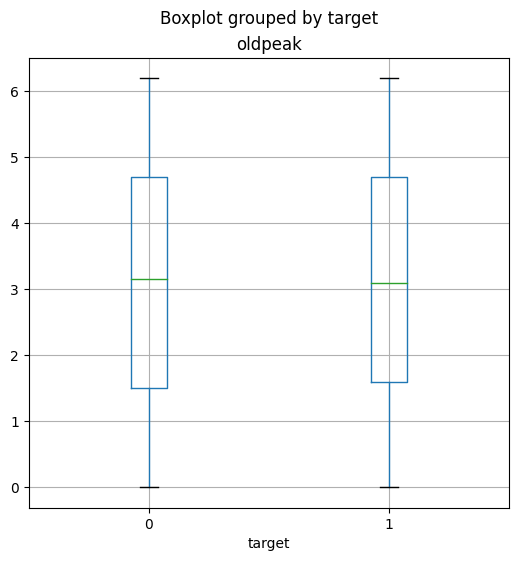

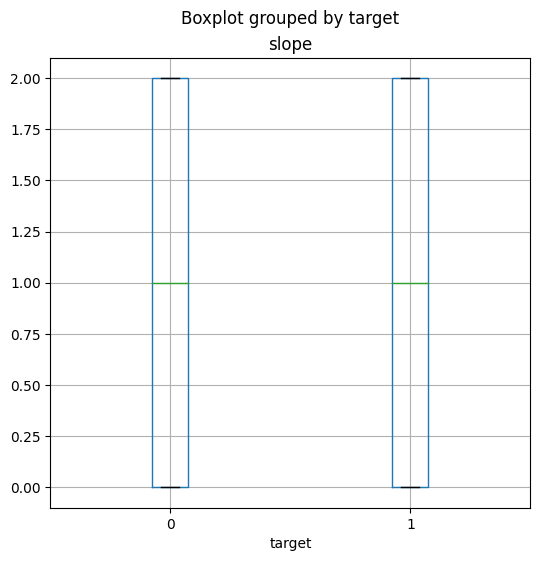

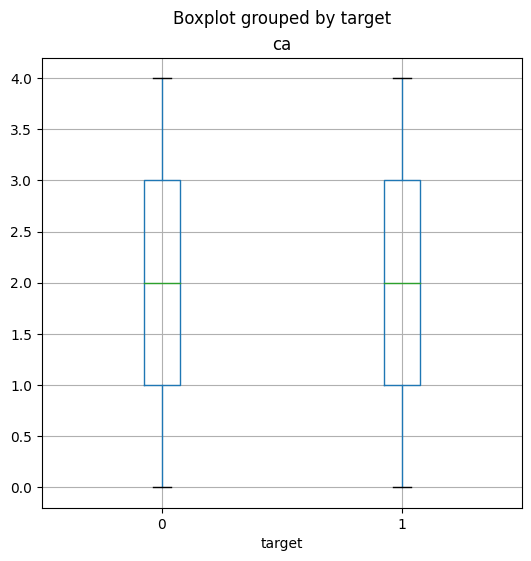

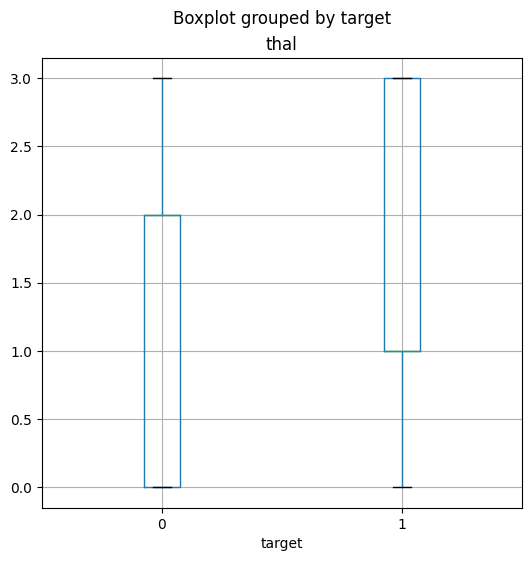

In [ ]:
features = hd_train_features
for col in features:
    hd_train.boxplot(column=col, by='target', figsize=(6,6))
    plt.title(col)
plt.show()

No outliers

Proceeding to Test Train Split

In [113]:
X, y = hd_train_features.values, hd_train_label.values

In [114]:
#train_test_split train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=0)

Pipeline

Predicting with pipeline

Random Forest Pipeline

In [124]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Since there is no scaling, we skip the preprocessing step for scaling
# Create a pipeline directly with the RandomForestClassifier

pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(n_estimators=100))])

# Fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Calculate the confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)

# Print results
print('Confusion Matrix:\n', cm, '\n')
print('Accuracy:', acc)


Confusion Matrix:
 [[ 2  5]
 [ 3 20]] 

Accuracy: 0.7333333333333333


model test on test data

In [125]:
model.__class__.__name__

'Pipeline'

In [126]:
hd_test=hd_test.drop('id',axis=1)

In [95]:
hd_test.shape

(2697, 13)

In [127]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = model.predict(hd_test)
submit = submission_template.copy()
submit['target'] = predictions
submit.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
submit.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
